In [1]:
%run SAT_help_functions.ipynb

## OUM

In [2]:
sample_size = 20
data_dir = '/Users/wangjiashun/Desktop/Reserach on SAT/datasets/Dutilh2019/validation_text_data/exp_4/pp'
SAT_conds = ["A", "B"]

In [3]:

class DriftConstantSpeedAcc(Drift):
    name = "DriftConstantSpeedAcc"
    required_parameters = ["Vspeed","Vacc"]
    required_conditions = ['cond']
        
    def get_drift(self, x, t, conditions, **kwargs):
        if conditions['cond'] == 'A':
            return self.Vspeed
        elif conditions['cond'] == 'B':
            return self.Vacc

class BoundCollapsingLinearSAT(BoundCollapsingLinear):
    name = "BoundSpeedAcc"
    required_parameters = ["B", "cSpeed", 'cAcc']
    required_conditions = ['cond']
        
    def get_bound(self, t, conditions, **kwargs):
        if conditions['cond'] == 'A':
            return max(self.B - self.cSpeed*t, 0.)
        elif conditions['cond'] == 'B':
            return max(self.B - self.cAcc*t, 0.)

class NondecisionSpeedAcc(OverlayNonDecision):
    name = "NondecisionSpeedAcc"
    required_parameters = ["tSpeed", 'tAcc']
    required_conditions = ['cond']
        
    def get_nondecision_time(self, conditions, **kwargs):
        if conditions['cond'] == 'A':
            return self.tSpeed 
        elif conditions['cond'] == 'B':
            return self.tAcc

In [4]:
df_all = pd.DataFrame()
for i in range(sample_size):
    print(i)
    path = os.path.join(data_dir+str(i+1)+".txt")
    df = pd.read_csv(path, sep = " ")
    #df = df[df["cond"]==SAT] # A condition
    df = df[df["rt"]<5]

    samp = Sample.from_pandas_dataframe(df, rt_column_name="rt", correct_column_name="correct")
    df = get_DDM_result_sub_2v2c2ter(samp)
    df_all = pd.concat((df_all,df))
    print(df)
df_OUM = df_all.copy()


0


Info: Params [1.00441611 1.29346549 0.79684864 0.65573614 0.         0.2356084
 0.35415629] gave 259.8291708300258


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.004416  1.293465             0.796849        0.655736                0.0   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.235608                    0.354156  259.829171  
1


Info: Params [0.22065335 0.57110874 0.96579556 1.16574926 0.15       0.22172657
 0.4324292 ] gave 472.52703551417585


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  0.220653  0.571109             0.965796        1.165749               0.15   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.221727                    0.432429  472.527036  
2


Info: Params [1.61462268 1.52281242 0.68241119 0.38829046 0.08176883 0.23207412
 0.38227688] gave 0.0640515253415046


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.614623  1.522812             0.682411         0.38829           0.081769   

   Non-decision Time Speed  Non-decision Time Accuracy       BIC  
0                 0.232074                    0.382277  0.064052  
3


Info: Params [0.14465724 0.95067538 0.74659895 0.62518921 0.00178478 0.11988378
 0.27390551] gave 382.2560778157049


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  0.144657  0.950675             0.746599        0.625189           0.001785   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.119884                    0.273906  382.256078  
4


Info: Params [0.83233343 1.44557472 0.69223018 0.51428571 0.13182217 0.20842991
 0.34670669] gave 134.54197606449725


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  0.832333  1.445575              0.69223        0.514286           0.131822   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                  0.20843                    0.346707  134.541976  
5


Info: Params [1.48909505 1.3107376  0.91971741 1.32758615 0.30555554 0.32201481
 0.4807629 ] gave 21.014155134701802


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.489095  1.310738             0.919717        1.327586           0.305556   

   Non-decision Time Speed  Non-decision Time Accuracy        BIC  
0                 0.322015                    0.480763  21.014155  
6


Info: Params [0.9214744  1.54421382 0.74266293 0.46357392 0.30478939 0.22538213
 0.30090849] gave 81.46550493750007


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  0.921474  1.544214             0.742663        0.463574           0.304789   

   Non-decision Time Speed  Non-decision Time Accuracy        BIC  
0                 0.225382                    0.300908  81.465505  
7


Info: Params [1.28302798 1.84956444 0.8948777  1.06914308 0.87510859 0.26839403
 0.35640307] gave -132.39985414353134


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.283028  1.849564             0.894878        1.069143           0.875109   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.268394                    0.356403 -132.399854  
8


Info: Params [1.10541966 1.54017138 0.68409866 0.92307692 0.         0.33620294
 0.36606866] gave -3.816592970788001


    Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.10542  1.540171             0.684099        0.923077                0.0   

   Non-decision Time Speed  Non-decision Time Accuracy       BIC  
0                 0.336203                    0.366069 -3.816593  
9


Info: Params [0.35405372 0.98208673 0.97057383 1.29545457 0.17582353 0.16013372
 0.46805105] gave 345.96870769473617


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  0.354054  0.982087             0.970574        1.295455           0.175824   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.160134                    0.468051  345.968708  
10


Info: Params [1.17763626 1.2237721  0.94194127 0.41871824 0.08473316 0.18944473
 0.31833193] gave 427.29045304192755


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.177636  1.223772             0.941941        0.418718           0.084733   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.189445                    0.318332  427.290453  
11


Info: Params [1.40485294 1.17484662 0.68699006 0.52541383 0.05137954 0.3076068
 0.41933011] gave 120.9230063018116


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.404853  1.174847              0.68699        0.525414            0.05138   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.307607                     0.41933  120.923006  
12


Info: Params [9.10122449e-01 1.29744114e+00 6.63330488e-01 4.49177252e-01
 3.37936857e-05 2.23920021e-01 2.97922075e-01] gave 57.674768191177996


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  0.910122  1.297441              0.66333        0.449177           0.000034   

   Non-decision Time Speed  Non-decision Time Accuracy        BIC  
0                  0.22392                    0.297922  57.674768  
13


Info: Params [1.08541633 1.1625166  0.77641285 0.8        0.01615693 0.20541458
 0.32405224] gave 211.2965044106461


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.085416  1.162517             0.776413             0.8           0.016157   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.205415                    0.324052  211.296504  
14


Info: Params [0.77694852 1.22885072 0.63165634 0.31958162 0.04545539 0.20209038
 0.26184744] gave 168.39434063411903


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  0.776949  1.228851             0.631656        0.319582           0.045455   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                  0.20209                    0.261847  168.394341  
15


Info: Params [1.39434630e+00 1.81029491e+00 7.56715804e-01 7.54358973e-01
 7.57523258e-05 2.16102000e-01 3.29224974e-01] gave -93.0064692585459


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.394346  1.810295             0.756716        0.754359           0.000076   

   Non-decision Time Speed  Non-decision Time Accuracy        BIC  
0                 0.216102                    0.329225 -93.006469  
16


Info: Params [1.06873198e+00 8.48508015e-01 5.76291118e-01 3.63669134e-01
 5.96069826e-06 2.62778979e-01 3.76384674e-01] gave 142.0416348533795


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.068732  0.848508             0.576291        0.363669           0.000006   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.262779                    0.376385  142.041635  
17


Info: Params [1.86668668 1.87965187 0.63262666 0.44680847 0.         0.28185146
 0.35341681] gave -144.99094380575505


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  1.866687  1.879652             0.632627        0.446808                0.0   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.281851                    0.353417 -144.990944  
18


Info: Params [2.0806805  1.43386502 0.68696825 0.34177215 0.         0.27013983
 0.31953661] gave 23.556853211567365


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  2.080681  1.433865             0.686968        0.341772                0.0   

   Non-decision Time Speed  Non-decision Time Accuracy        BIC  
0                  0.27014                    0.319537  23.556853  
19


Info: Params [0.20894607 0.70162398 0.68401265 0.37679561 0.15583252 0.20495614
 0.32262177] gave 349.77060303803046


     Vspeed      Vacc  Boundary Separation  Collapse Speed  Collapse Accuracy  \
0  0.208946  0.701624             0.684013        0.376796           0.155833   

   Non-decision Time Speed  Non-decision Time Accuracy         BIC  
0                 0.204956                    0.322622  349.770603  


In [5]:
df_OUM.to_csv("DDM2v2c2terresultDutilh2019.csv")

In [6]:
df_OUM["BIC"].mean()

141.2200491510361

In [7]:
def transform_df_DDM2a2c2ter(df):
    SAT = [copy.copy(e) for _ in range(len(df)) for e in ["Speed"]] + [copy.copy(e) for _ in range(len(df)) for e in ["Accuracy"]]
    df_speed = df.loc[:, ["Drift Rate", "Boundary Separation Speed", "Non-decision Time Speed", "Collapse Speed"]]
    df_speed = df_speed.rename(columns={
                                        "Boundary Separation Speed": "Boundary Separation",
                                        "Non-decision Time Speed": "Non-decision Time",
                                        "Collapse Speed":"Collapse Rate"})

    df_accuracy = df.loc[:, ["Boundary Separation Accuracy", "Non-decision Time Accuracy", "Collapse Accuracy"]]
    df_accuracy = df_accuracy.rename(columns={
                                              "Boundary Separation Accuracy": "Boundary Separation",
                                              "Non-decision Time Accuracy": "Non-decision Time",
                                              "Collapse Accuracy":"Collapse Rate"})

    df_concat = pd.concat((df_speed, df_accuracy), ignore_index=True)
    df_concat["SAT"] = SAT

    df_melted = pd.melt(df_concat, id_vars = ["SAT"], 
                            value_vars=['Boundary Separation','Non-decision Time', 'Collapse'],
                            var_name = "Parameter", value_name = "Value")
    return df_melted

KeyError: "['Drift Rate', 'Boundary Separation Speed'] not in index"

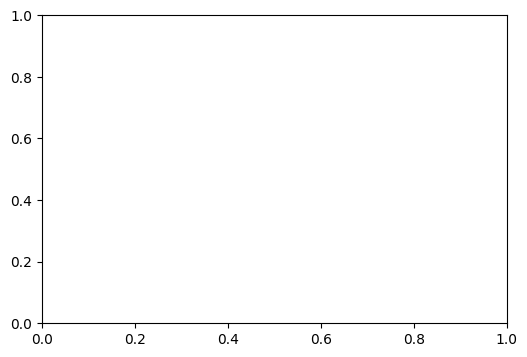

In [8]:
#df = pd.read_csv("DDM2vsvUniform101bins2a2terresultDutilh2019.csv")
df = df_OUM.copy()
f, ax = plt.subplots(1, 1,figsize=(6, 4))#, sharey=True)
sns.barplot(ax = ax, data=transform_df_DDM2a2c2ter(df), x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"])